https://xuanshay.github.io

# Project: Popular Video Game Trend

###### Group Memebers: Yuxuan Zhang, Haowen Weng

With the rapid development of electronic information technology, electronic games have become one of the most popular forms of entertainment.  Especially in recent years, the concept of e-sports has been recognized by the society to a certain extent. In the circle of young people, gaming-related topics and discussions begin to occupy a certain proportion in the social process.  In this context, we are gradually interested in the video game industry, hoping to study the current mainstream trend of video games through scientific methods, and hope to trigger the thinking of game industry practitioners.  



---

## Contents:
- Purpose and Questions
- Datasets
- Initialization
- Data Generalization, Extraction, Transfrom, and Load
- Analyzing datasets and getting into the problems

---

### Purpose and Questions:

As we said, trends are our core research direction, and we break them down into several step-by-step discussions.  (If you don't want to read this part, you can skip and read the three questions at the end.) 
 
First is the macro market. How has the market of the entire game industry been distributed since the advent of video games in the last century?  Because of our size, we don't want to consider the recent boom in the mobile game market, nor do we want to focus on trends that go back too far, so our first question is: How have the major game makers fared in the 21st century?  This will help us understand players' choice of major manufacturers for our games.  

Secondly the players' preferences for game types.  Given the cultural differences leading some differences in how players respond to different types of games, we will explore the preferences of players in each of the four major regions where games are sold: North America, Europe, Japan, and others.  

Thirdly the trend of individual games.  Although people's choices vary for a variety of reasons, there will always be individual games that are popular, and there will always be similarities and differences between those games. We hope that studying the average lifespan of such games will provide a relatively reliable standard for those in the game industry.  

* Game production companies' preformance in 21th century.
* Players' taste in different region 
* The lifttime of a game


---

## Datasets:
* Video Games Sales  
    * Downloaded from https://www.kaggle.com/gregorut/videogamesales  
    * The dataset contains a list of video games with sales greater than 100,000 copies. The release year of the games are between 1980 and 2020
* Steam database
    * Scraped from https://store.steampowered.com/stats/
    * The website introduced games with most steam users. It includes both current players and the peak of the day.
* Previous Steam Games Ranking
    * Downloaded from https://www.kaggle.com/michau96/popularity-of-games-on-steam/version/6
    * Th data shows the top trending games with most players of previous years

---

## Initialization

In [1]:
!pip install beautifulsoup4
!pip install requests
!pip install pandas
!pip install numpy
!pip install html5lib
!pip3 install lxml

!pip install html5lib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
#%matplotlib inline
import numpy as np
import pandas as pd
import requests
import numpy
import lxml
from bs4 import BeautifulSoup
import re
import html5lib

---

## Data Generalization, Extraction, Transfrom, and Load

### Data Set 1: Video Games Slaes

This dataset is generated by a scrape of [VGChartz](https://www.vgchartz.com/). It contains a list of video games with sales greater than 100,000 copies in worldwide. It contains the data of sales in different region we mention: (NA, EU, JP,others), game name, platform, release year, genre and publisher

Notice: 1.) Sales are in millions.  2.) Data collected from 2017.  

This is a quick peek on how it looks like

In [3]:
vgs = pd.read_csv("vgsales.csv")
vgs.head(15)

Rank                         Name Platform    Year         Genre  \
0      1                   Wii Sports      Wii  2006.0        Sports   
1      2            Super Mario Bros.      NES  1985.0      Platform   
2      3               Mario Kart Wii      Wii  2008.0        Racing   
3      4            Wii Sports Resort      Wii  2009.0        Sports   
4      5     Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
5      6                       Tetris       GB  1989.0        Puzzle   
6      7        New Super Mario Bros.       DS  2006.0      Platform   
7      8                     Wii Play      Wii  2006.0          Misc   
8      9    New Super Mario Bros. Wii      Wii  2009.0      Platform   
9     10                    Duck Hunt      NES  1984.0       Shooter   
10    11                   Nintendogs       DS  2005.0    Simulation   
11    12                Mario Kart DS       DS  2005.0        Racing   
12    13  Pokemon Gold/Pokemon Silver       GB  1999.0  Role-Playing   
13    14                      Wii Fit      Wii  2007.0        Sports   
14    15                 Wii Fit Plus      Wii  2009.0        Sports   

   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0   Nintendo     41.49     29.02      3.77         8.46         82.74  
1   Nintendo     29.08      3.58      6.81         0.77         40.24  
2   Nintendo     15.85     12.88      3.79         3.31         35.82  
3   Nintendo     15.75     11.01      3.28         2.96         33.00  
4   Nintendo     11.27      8.89     10.22         1.00         31.37  
5   Nintendo     23.20      2.26      4.22         0.58         30.26  
6   Nintendo     11.38      9.23      6.50         2.90         30.01  
7   Nintendo     14.03      9.20      2.93         2.85         29.02  
8   Nintendo     14.59      7.06      4.70         2.26         28.62  
9   Nintendo     26.93      0.63      0.28         0.47         28.31  
10  Nintendo      9.07     11.00      1.93         2.75         24.76  
11  Nintendo      9.81      7.57      4.13         1.92         23.42  
12  Nintendo      9.00      6.18      7.20         0.71         23.10  
13  Nintendo      8.94      8.03      3.60         2.15         22.72  
14  Nintendo      9.09      8.59      2.53         1.79         22.00

### Data Set 2: Steam database

First, we scrap and generate the dataframe using several pandas functions

In [4]:
header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get('https://store.steampowered.com/stats/',headers=header)
resource = response.text

In [5]:
souped_resource = BeautifulSoup(resource,"html.parser")
prettify_resource = BeautifulSoup.prettify(souped_resource)
soup = BeautifulSoup(prettify_resource)
table_found = soup.find("div",{'id' : "detailStats"})

In [6]:
table_found = re.sub("display: none;",'',str(table_found))

In [7]:
table = pd.read_html(str(table_found))

In [8]:
df_steam = pd.DataFrame(table[0])

In [9]:
df_steam

0           1   2                                 3   4
0    Current Players  Peak Today NaN                              Game NaN
1                NaN         NaN NaN                               NaN NaN
2             539730      807333 NaN  Counter-Strike: Global Offensive NaN
3             435254      708866 NaN                            Dota 2 NaN
4             232073      339944 NaN               PUBG: BATTLEGROUNDS NaN
..               ...         ...  ..                               ...  ..
97              7090       10978 NaN      Fall Guys: Ultimate Knockout NaN
98              7070       15212 NaN                          Among Us NaN
99              6927        8216 NaN                    Slay the Spire NaN
100             6863        9169 NaN                    Eternal Return NaN
101             6687       10527 NaN                              SCUM NaN

[102 rows x 5 columns]

In [10]:
df_steam = df_steam.loc[2:]

In [11]:
#drop blank columns
df_steam =df_steam.drop(columns = 2)
df_steam =df_steam.drop(columns = 4)

In [12]:
#Set the columns index
df_steam.columns=['Current Players','Peak Today','Game']

In [13]:
#set the name of the games throughtout all database the same 
df_steam['Game'][4] = 'PLAYERUNKNOWN\'S BATTLEGROUNDS'

In [14]:
df_steam

Current Players Peak Today                              Game
2            539730     807333  Counter-Strike: Global Offensive
3            435254     708866                            Dota 2
4            232073     339944     PLAYERUNKNOWN'S BATTLEGROUNDS
5            149423     211602                      Apex Legends
6            118832     151248                NARAKA: BLADEPOINT
..              ...        ...                               ...
97             7090      10978      Fall Guys: Ultimate Knockout
98             7070      15212                          Among Us
99             6927       8216                    Slay the Spire
100            6863       9169                    Eternal Return
101            6687      10527                              SCUM

[100 rows x 3 columns]

### Data Set 3: Previous players count for games on steam


In [15]:
# Read the csv file
df_previous_user = pd.read_csv("SteamCharts.csv",encoding='latin1')
df_previous_user

gamename  year      month        avg      gain  \
0      Counter-Strike: Global Offensive  2021  February   741013.24  -2196.42   
1      Counter-Strike: Global Offensive  2021   January   743209.66  25405.91   
2      Counter-Strike: Global Offensive  2020  December   717803.75  49049.17   
3      Counter-Strike: Global Offensive  2020  November   668754.58  55087.89   
4      Counter-Strike: Global Offensive  2020   October   613666.69   6816.37   
...                                 ...   ...        ...        ...       ...   
83784       Steel Division: Normandy 44  2017      July      421.60   -485.13   
83785       Steel Division: Normandy 44  2017      June      906.74   -231.92   
83786       Steel Division: Normandy 44  2017       May     1138.66    415.61   
83787       Steel Division: Normandy 44  2017     April      723.05    720.21   
83788       Steel Division: Normandy 44  2017     March        2.84       NaN   

          peak avg_peak_perc  
0      1123485      65.9567%  
1      1124553      66.0893%  
2      1164396       61.646%  
3      1037464      64.4605%  
4       943876      65.0156%  
...        ...           ...  
83784      987      42.7153%  
83785     2584      35.0906%  
83786     4606      24.7212%  
83787     1911      37.8362%  
83788       14      20.2857%  

[83789 rows x 7 columns]

--- 

## Analyzing datasets and getting into the problems

### 1. Game production companies' preformance in 21th century.
##### ----Which game producers are player's favorite

To find out the main stream tendency of gaming industries, we better first investigate publishing companies, Let's overview the performance of all the manufacturers since 2000. Here we are showing the games releasing after 2000

In [16]:
recent_game = vgs.loc[vgs["Year"]>2000]
recent_game

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
6          7                             New Super Mario Bros.       DS   
7          8                                          Wii Play      Wii   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year     Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0    Sports    Nintendo     41.49     29.02      3.77   
2      2008.0    Racing    Nintendo     15.85     12.88      3.79   
3      2009.0    Sports    Nintendo     15.75     11.01      3.28   
6      2006.0  Platform    Nintendo     11.38      9.23      6.50   
7      2006.0      Misc    Nintendo     14.03      9.20      2.93   
...       ...       ...         ...       ...       ...       ...   
16593  2002.0  Platform       Kemco      0.01      0.00      0.00   
16594  2003.0   Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0    Racing  Activision      0.00      0.00      0.00   
16596  2010.0    Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0  Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
2             3.31         35.82  
3             2.96         33.00  
6             2.90         30.01  
7             2.85         29.02  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[14004 rows x 11 columns]

That's quite a lot, now we are grouping these games by their producer, and then let's see those producer companies with more than 50 millions sales of games. We will using a pie chart and noticing how the market shares are taken.

<AxesSubplot:title={'center':'Game Industry Market Shares'}, ylabel='Global_Sales'>

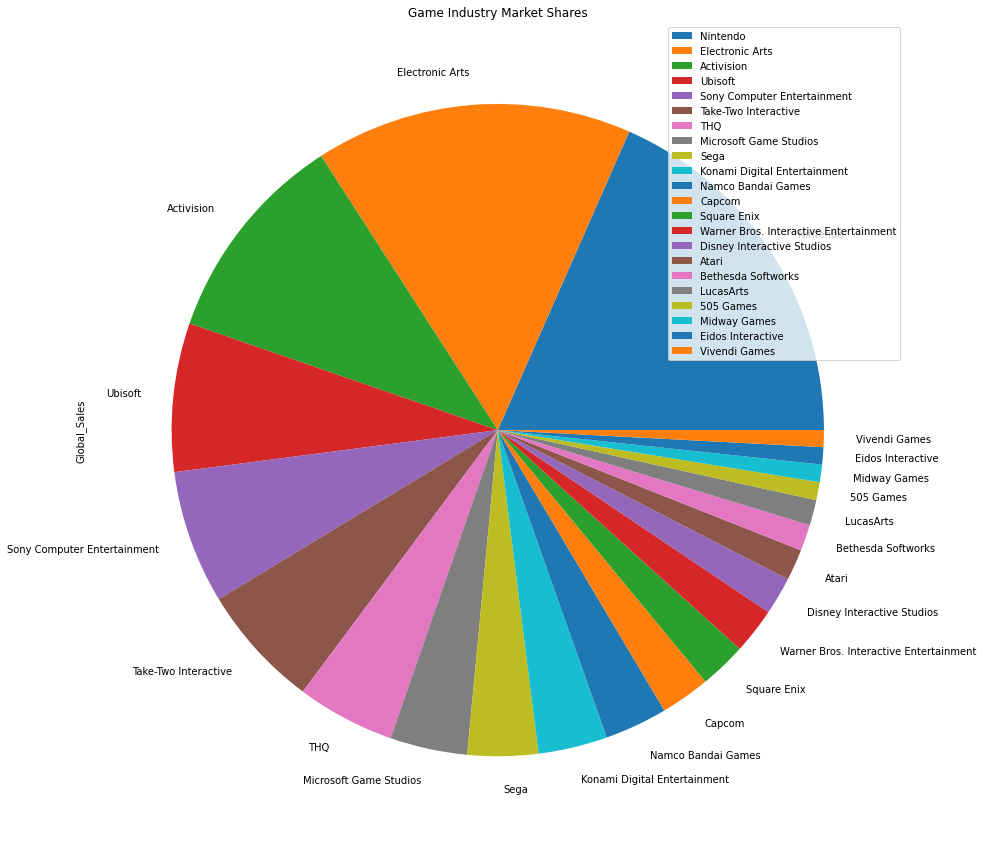

In [17]:
companies = recent_game.groupby("Publisher").sum().sort_values("Global_Sales",ascending=False)
del companies["Year"]
del companies["Rank"]
top_tier = companies.loc[companies["Global_Sales"]>50]
top_tier.plot.pie(y="Global_Sales",figsize=(15, 15),title="Game Industry Market Shares")

This chart is giving us a message that game industry company are ralatively static, since we can see how there are few companies take a big share of the video game market.

However, this chart conclude all sales from 2000 till now, to investigate the performance macroscopically, we want to know the flowing of sales of game producing over periods. 

Let's set the period to 4 years. We can divide the periods into 2000-2003, 2004-2007, 2008-2011, 2012-2016, respectively called q1,q2,q3,q4, for each period, we will conclude the top 10 producers in the market.

In [18]:
q1 = recent_game.loc[recent_game["Year"]<2004]

q2 = recent_game.loc[recent_game["Year"]<2008]
q2 = q2.loc[recent_game["Year"]>2003]

q3 = recent_game.loc[recent_game["Year"]>2007]
q3 = q3.loc[recent_game["Year"]<2012]

q4 = recent_game.loc[recent_game["Year"]>2012]

In [19]:
company_q1 = q1.groupby("Publisher").sum().sort_values("Global_Sales",ascending=False).loc[:,["Global_Sales"]]
company_q2 = q2.groupby("Publisher").sum().sort_values("Global_Sales",ascending=False).loc[:,["Global_Sales"]]
company_q3 = q3.groupby("Publisher").sum().sort_values("Global_Sales",ascending=False).loc[:,["Global_Sales"]]
company_q4 = q4.groupby("Publisher").sum().sort_values("Global_Sales",ascending=False).loc[:,["Global_Sales"]]

In [20]:
top_10_q1 = company_q1.iloc[:10]
top_10_q2 = company_q2.iloc[:10]
top_10_q3 = company_q3.iloc[:10]
top_10_q4 = company_q4.iloc[:10]

Now we can view the top 10 from each period according to order

In [21]:
top_10_q1

Global_Sales
Publisher                                 
Electronic Arts                     187.96
Nintendo                            131.82
Sony Computer Entertainment          93.46
THQ                                  78.51
Activision                           65.91
Take-Two Interactive                 51.29
Konami Digital Entertainment         48.28
Atari                                46.34
Ubisoft                              38.09
Sega                                 31.43

In [22]:
top_10_q2

Global_Sales
Publisher                                 
Nintendo                            497.91
Electronic Arts                     264.08
Activision                          155.59
Sony Computer Entertainment         132.89
THQ                                 109.15
Ubisoft                              97.76
Take-Two Interactive                 90.80
Konami Digital Entertainment         66.93
Sega                                 63.02
Microsoft Game Studios               55.45

In [23]:
top_10_q3

Global_Sales
Publisher                                 
Nintendo                            332.71
Electronic Arts                     323.95
Activision                          260.60
Ubisoft                             195.10
Sony Computer Entertainment         125.46
Take-Two Interactive                119.16
THQ                                 110.15
Sega                                101.79
Microsoft Game Studios              101.36
Konami Digital Entertainment         72.50

In [24]:
top_10_q4

Global_Sales
Publisher                                           
Electronic Arts                               157.39
Nintendo                                      131.99
Activision                                    127.27
Take-Two Interactive                          100.59
Ubisoft                                        92.18
Warner Bros. Interactive Entertainment         64.04
Sony Computer Entertainment                    49.20
Namco Bandai Games                             41.65
Microsoft Game Studios                         38.07
Square Enix                                    36.60

Next step we will join each table and gets the flow of top 10 publishers over the 4 periods.

In [25]:
#visualize (to be finished)
company_q1["period"]="2000-2003"
company_q2["period"]="2004-2007"
company_q3["period"]="2008-2011"
company_q4["period"]="2012-2016"
top_10_over_time = company_q1.iloc[:10]
top_10_over_time=top_10_over_time.append(company_q2.iloc[:10])
top_10_over_time=top_10_over_time.append(company_q3.iloc[:10])
top_10_over_time=top_10_over_time.append(company_q4.iloc[:10])
top_10_over_time.head(10)

Global_Sales     period
Publisher                                            
Electronic Arts                     187.96  2000-2003
Nintendo                            131.82  2000-2003
Sony Computer Entertainment          93.46  2000-2003
THQ                                  78.51  2000-2003
Activision                           65.91  2000-2003
Take-Two Interactive                 51.29  2000-2003
Konami Digital Entertainment         48.28  2000-2003
Atari                                46.34  2000-2003
Ubisoft                              38.09  2000-2003
Sega                                 31.43  2000-2003

Now, lets get an visual aid on how Top 10 game publishers' sales on 21th century look like (y-axis is sales by million copy)

Text(0.5, 1.0, "Top 10 game publishers' sales on 21th century")

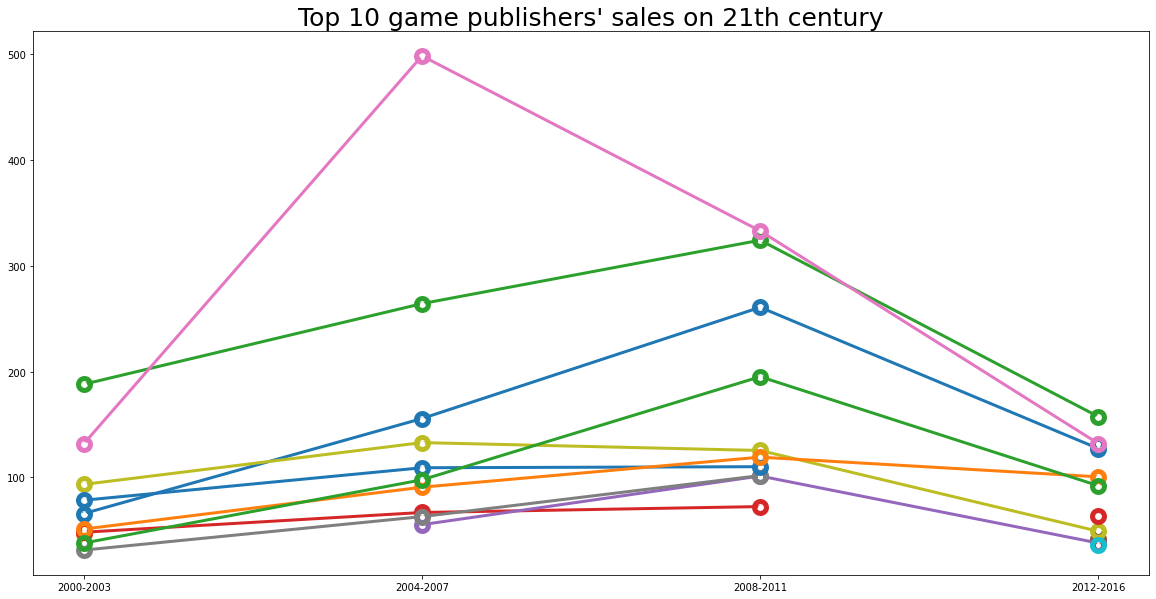

In [58]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)
for i, j in top_10_over_time.groupby("Publisher"):
    plt.plot( "period", "Global_Sales","o-", data=j,lw=3,mfc="w",mew=12,ms=5)
plt.title("Top 10 game publishers' sales on 21th century",size =25)

### Now we can conclude our thinking on our first quesition: 
It's clear that over the years, some game companies have managed to hold a firm part on the video game market, and over the years, only three companies have been overtaken by others: Atari(after 2004), THQ and Konami(both after 2012). On the other hand, Electric Arts and Nintendo stayed at the top 2 all the time with the rest still remaining on this list. 

#### It is conceivable that some opinions have been formed in the minds of players, such as that XXX's games should be excellent, and these opinions will occupy the mainstream in a short time.  


### 2. Players' taste in different regions

##### --what would player prefer to play under different culture and environment

To do this, we need to fisrt analysis the sales of different genre within our 4 main regions of games selling (North America, Europe, Japen, Others). Here we are using pie chart again, this is good for us to peek the faviourite game genre (like what % is one game genre took away and how is it compared to other genre. )

<AxesSubplot:title={'center':'Sales of genre in North America'}, ylabel='NA_Sales'>

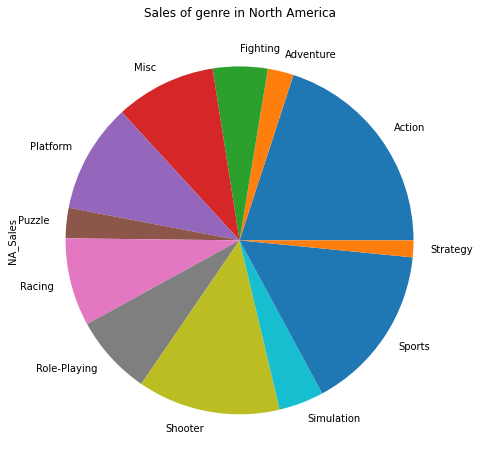

In [27]:
NA_genre= vgs.groupby("Genre")["NA_Sales"].sum()
NA_genre.plot.pie(figsize=(8, 8),title = "Sales of genre in North America")

<AxesSubplot:title={'center':'Sales of genre in Europe'}, ylabel='EU_Sales'>

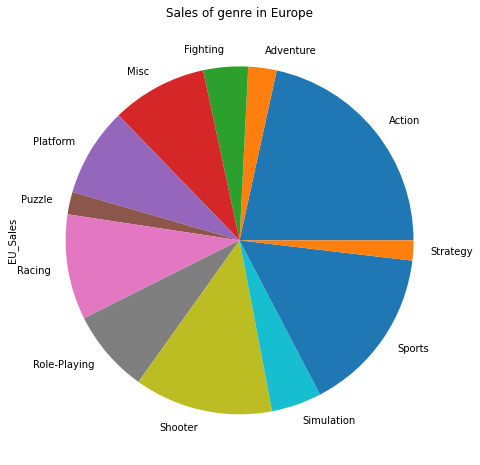

In [28]:
EU_genre = vgs.groupby("Genre")["EU_Sales"].sum()
EU_genre.plot.pie(figsize=(8, 8),title = "Sales of genre in Europe")

<AxesSubplot:title={'center':'Sales of genre in Japen'}, ylabel='JP_Sales'>

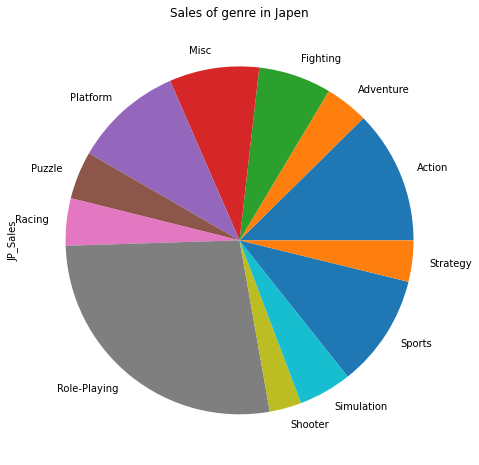

In [29]:
JP_genre = vgs.groupby("Genre")["JP_Sales"].sum()
JP_genre.plot.pie(figsize=(8, 8),title="Sales of genre in Japen")

<AxesSubplot:title={'center':'Sales of genre in all other places'}, ylabel='Other_Sales'>

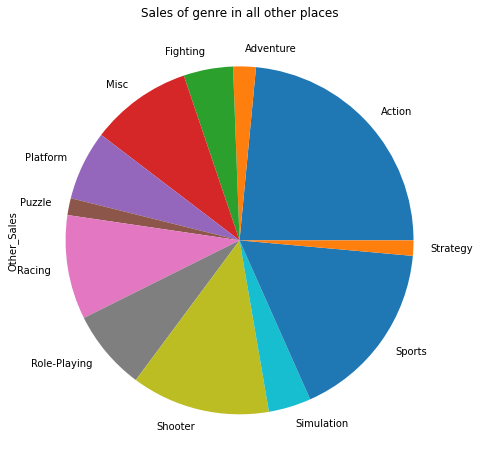

In [30]:
OT_genre = vgs.groupby("Genre")["Other_Sales"].sum()
OT_genre.plot.pie(figsize=(8, 8),title="Sales of genre in all other places")

After seeing every region's distribution, we have to standardized value of each type of games within a region, and then we can make a table such that joining all the data, then we can also calculate the world_average data for this in order to seek out the main trend worldwide.

In [31]:
NA_genre_por = NA_genre/NA_genre.sum()
EU_genre_por = EU_genre/EU_genre.sum()
JP_genre_por = JP_genre/JP_genre.sum()
OT_genre_por = OT_genre/OT_genre.sum()
world_genre = NA_genre_por.to_frame().join(EU_genre_por).join(JP_genre_por).join(OT_genre_por)
world_genre["World_Average"]=(world_genre["NA_Sales"]+world_genre["EU_Sales"]+world_genre["JP_Sales"]+world_genre["Other_Sales"])/4
world_genre.sort_values("World_Average",ascending=False)

NA_Sales  EU_Sales  JP_Sales  Other_Sales  World_Average
Genre                                                                 
Action        0.199827  0.215683  0.123894     0.234886       0.193572
Sports        0.155556  0.154819  0.104855     0.169188       0.146105
Role-Playing  0.074501  0.077260  0.272893     0.074723       0.124844
Shooter       0.132622  0.128699  0.029651     0.128725       0.104924
Misc          0.093386  0.088730  0.083469     0.094416       0.090000
Platform      0.101765  0.082835  0.101292     0.064669       0.087640
Racing        0.081817  0.097936  0.043911     0.096860       0.080131
Fighting      0.050897  0.041625  0.067660     0.045979       0.051540
Simulation    0.041728  0.046579  0.049341     0.039511       0.044290
Adventure     0.024084  0.026346  0.040332     0.021072       0.027959
Puzzle        0.028177  0.020862  0.044391     0.015732       0.027290
Strategy      0.015639  0.018627  0.038311     0.014240       0.021704

This table looks good, now let's behold the trend of all game genre in this graph belows.

<AxesSubplot:title={'center':'Sales (standized value) of different game genre in different region'}, xlabel='Genre'>

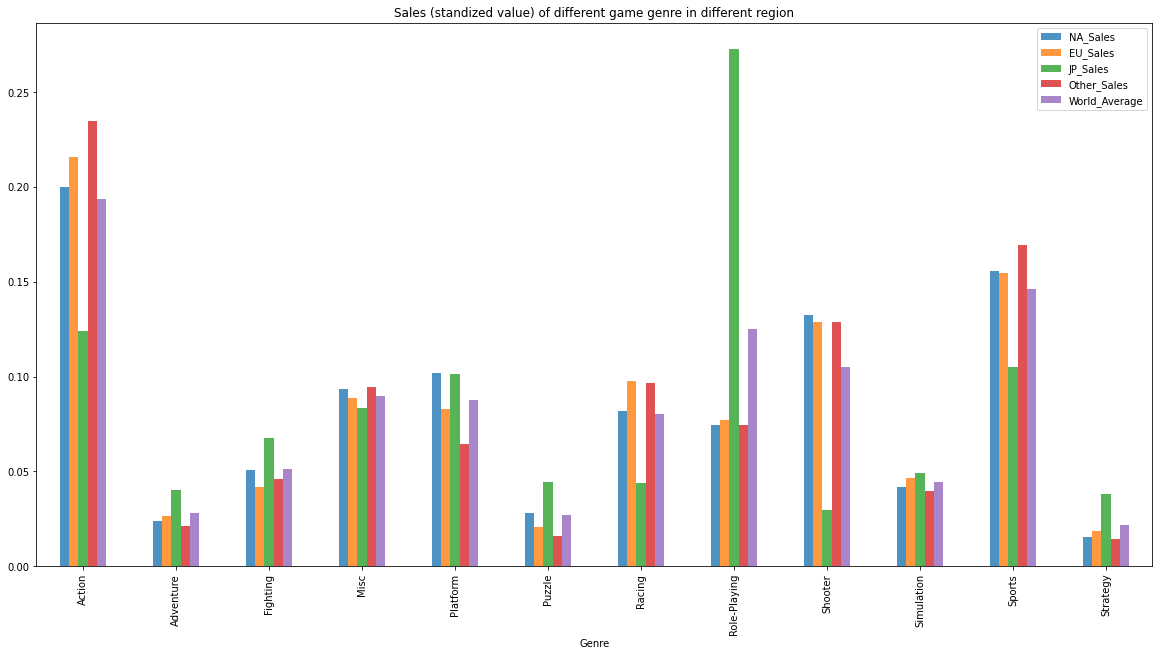

In [32]:
world_genre.plot.bar(alpha=0.8,figsize = (20,10),title = "Sales (standized value) of different game genre in different region")

### Now we can conclude our thinking on our second quesition: 
That's very clear that what type of game are prefered by players from differnt area.

##### 1) Action Game(0.194) seems to be generally the most favored genre all around the world, second is sports(0.146) and third is role-playing(0.125)

##### 2) Most minority types of game: Adventure(0.0280), Puzzle(0.0273), Strategy(0.0217). this might due to the relativgely hardcore playing style which not really mean to be a way to entertain for many consumers.

##### 3) Japaness people are indeed obsessed with the Role-playing (that long green bar), this might lead by the well-development of JRPG and the dense local culture

### 3. The lifetime of a game

#### Find out the data we need from different datasets

For this part, we are going to find the ranking of top 100 games from 2016 till present.  
Afterwards, we will see the change on rankings and possibly find out a trend and the average years a game can be considered popular.  
In this part popular is defined as the number of players is in top 100




##### A little formatting stuff for the scraped dataframe

In [33]:
df_steam_now = df_steam

In [34]:
df_steam_now = df_steam_now.reset_index(drop = True)

In [35]:
# Add two columns:Year and Ranking for the data we scraped from steam(which is the present ranking)
i = 0
df_steam_now['Year'] = 2021
df_steam_now['Ranking'] = np.nan
for i in range(len(df_steam_now['Ranking'])):
  df_steam_now.loc[i,'Ranking'] = int(i+1)

In [36]:
df_steam_now

Current Players Peak Today                              Game  Year  Ranking
0           539730     807333  Counter-Strike: Global Offensive  2021      1.0
1           435254     708866                            Dota 2  2021      2.0
2           232073     339944     PLAYERUNKNOWN'S BATTLEGROUNDS  2021      3.0
3           149423     211602                      Apex Legends  2021      4.0
4           118832     151248                NARAKA: BLADEPOINT  2021      5.0
..             ...        ...                               ...   ...      ...
95            7090      10978      Fall Guys: Ultimate Knockout  2021     96.0
96            7070      15212                          Among Us  2021     97.0
97            6927       8216                    Slay the Spire  2021     98.0
98            6863       9169                    Eternal Return  2021     99.0
99            6687      10527                              SCUM  2021    100.0

[100 rows x 5 columns]

In [37]:
# drop Current Players and Peak Today as we don't need to compare these data later on
top_game = df_steam_now
del top_game['Current Players']
del top_game['Peak Today']

#set the index of top_game the same as df_previous_user
top_game.rename({'Game': 'gamename', 'Year': 'year'}, axis=1, inplace=True)
top_game

gamename  year  Ranking
0   Counter-Strike: Global Offensive  2021      1.0
1                             Dota 2  2021      2.0
2      PLAYERUNKNOWN'S BATTLEGROUNDS  2021      3.0
3                       Apex Legends  2021      4.0
4                 NARAKA: BLADEPOINT  2021      5.0
..                               ...   ...      ...
95      Fall Guys: Ultimate Knockout  2021     96.0
96                          Among Us  2021     97.0
97                    Slay the Spire  2021     98.0
98                    Eternal Return  2021     99.0
99                              SCUM  2021    100.0

[100 rows x 3 columns]

### Collect data from all database

For previous ranking, we are ranking them based on the average players.

#### 2020 Ranking

In [38]:
data_2020 = df_previous_user.loc[(df_previous_user['year']==2020) & (df_previous_user['month']=="November ")]

#delete unrelated columns
del data_2020['gain']
del data_2020['peak']
del data_2020['avg_peak_perc']
del data_2020['month']

#sort by average players
data_2020 = data_2020.sort_values(by=['avg'],ascending= False)

#find top 100
data_2020 = data_2020[:100]

#reset index
data_2020 = data_2020.reset_index(drop= True)

#set ranking
i = 0
data_2020['Ranking'] = np.nan
for i in range(len(data_2020['Ranking'])):
  data_2020.loc[i,'Ranking']= int(i+1)

# delete average players
del data_2020['avg']

In [39]:
#append to top_game
top_game = top_game.append(data_2020)

#### 2019 Ranking

In [40]:
data_2019 = df_previous_user.loc[(df_previous_user['year']==2019) & (df_previous_user['month']=="November ")]

#delete unrelated columns
del data_2019['gain']
del data_2019['peak']
del data_2019['avg_peak_perc']
del data_2019['month']

#sort by average players
data_2019 = data_2019.sort_values(by=['avg'],ascending= False)

#find top 100
data_2019 = data_2019[:100]

#reset index
data_2019 = data_2019.reset_index(drop= True)

#set ranking
i = 0
data_2019['Ranking'] = np.nan
for i in range(len(data_2019['Ranking'])):
  data_2019.loc[i,'Ranking']= int(i+1)

# delete average players
del data_2019['avg']

In [41]:
#append to top_game
top_game = top_game.append(data_2019)

#### 2018 Ranking

In [42]:
data_2018 = df_previous_user.loc[(df_previous_user['year']==2018) & (df_previous_user['month']=="November ")]

#delete unrelated columns
del data_2018['gain']
del data_2018['peak']
del data_2018['avg_peak_perc']
del data_2018['month']	

#sort by average players
data_2018 = data_2018.sort_values(by=['avg'],ascending= False)

#find top 100
data_2018 = data_2018[:100]

#reset index
data_2018 = data_2018.reset_index(drop= True)

#set ranking
i = 0
data_2018['Ranking'] = np.nan
for i in range(len(data_2018['Ranking'])):
  data_2018.loc[i,'Ranking']= int(i+1)

# delete average players
del data_2018['avg']
data_2018

gamename  year  Ranking
0                              Dota 2  2018      1.0
1       PLAYERUNKNOWN'S BATTLEGROUNDS  2018      2.0
2    Counter-Strike: Global Offensive  2018      3.0
3                            Warframe  2018      4.0
4      Tom Clancy's Rainbow Six Siege  2018      5.0
..                                ...   ...      ...
95  Sins of a Solar Empire: Rebellion  2018     96.0
96                   Z1 Battle Royale  2018     97.0
97                    Space Engineers  2018     98.0
98          DISTRAINT: Deluxe Edition  2018     99.0
99                           Crossout  2018    100.0

[100 rows x 3 columns]

In [43]:
#append to top_game
top_game = top_game.append(data_2018)
top_game = top_game.reset_index(drop = True)

#### 2017 Ranking

In [44]:
data_2017 = df_previous_user.loc[(df_previous_user['year']==2017) & (df_previous_user['month']=="November ")]

#delete unrelated columns
del data_2017['gain']
del data_2017['peak']
del data_2017['avg_peak_perc']
del data_2017['month']	

#sort by average players
data_2017 = data_2017.sort_values(by=['avg'],ascending= False)

#find top 100
data_2017 = data_2017[:100]

#reset index
data_2017 = data_2017.reset_index(drop= True)

#set ranking
i = 0
data_2017['Ranking'] = np.nan
for i in range(len(data_2017['Ranking'])):
  data_2017.loc[i,'Ranking']= int(i+1)

# delete average players
del data_2017['avg']


In [45]:
top_game = top_game.append(data_2017)
top_game = top_game.reset_index(drop = True)

#### 2016 Ranking

In [46]:
data_2016 = df_previous_user.loc[(df_previous_user['year']==2016) & (df_previous_user['month']=="November ")]

#delete unrelated columns
del data_2016['gain']
del data_2016['peak']
del data_2016['avg_peak_perc']
del data_2016['month']	

#sort by average players
data_2016 = data_2016.sort_values(by=['avg'],ascending= False)

#find top 100
data_2016 = data_2016[:100]

#reset index
data_2016 = data_2016.reset_index(drop= True)

#set ranking
i = 0
data_2016['Ranking'] = np.nan
for i in range(len(data_2016['Ranking'])):
  data_2016.loc[i,'Ranking']= int(i+1)

# delete average players
del data_2016['avg']


In [47]:
top_game = top_game.append(data_2016)
top_game = top_game.reset_index(drop = True)

In [48]:
top_game

gamename  year  Ranking
0               Counter-Strike: Global Offensive  2021      1.0
1                                         Dota 2  2021      2.0
2                  PLAYERUNKNOWN'S BATTLEGROUNDS  2021      3.0
3                                   Apex Legends  2021      4.0
4                             NARAKA: BLADEPOINT  2021      5.0
..                                           ...   ...      ...
595                              Space Engineers  2016     96.0
596  Microsoft Flight Simulator X: Steam Edition  2016     97.0
597                                  Dying Light  2016     98.0
598                 Counter-Strike Nexon: Studio  2016     99.0
599                          Total War: SHOGUN 2  2016    100.0

[600 rows x 3 columns]

### Generating a bump chart from top_game


We found the way to generate a bump chart in pandas from the website: https://stackoverflow.com/questions/68095438/how-to-make-a-bump-chart

In [59]:
import warnings
warnings.filterwarnings("ignore")

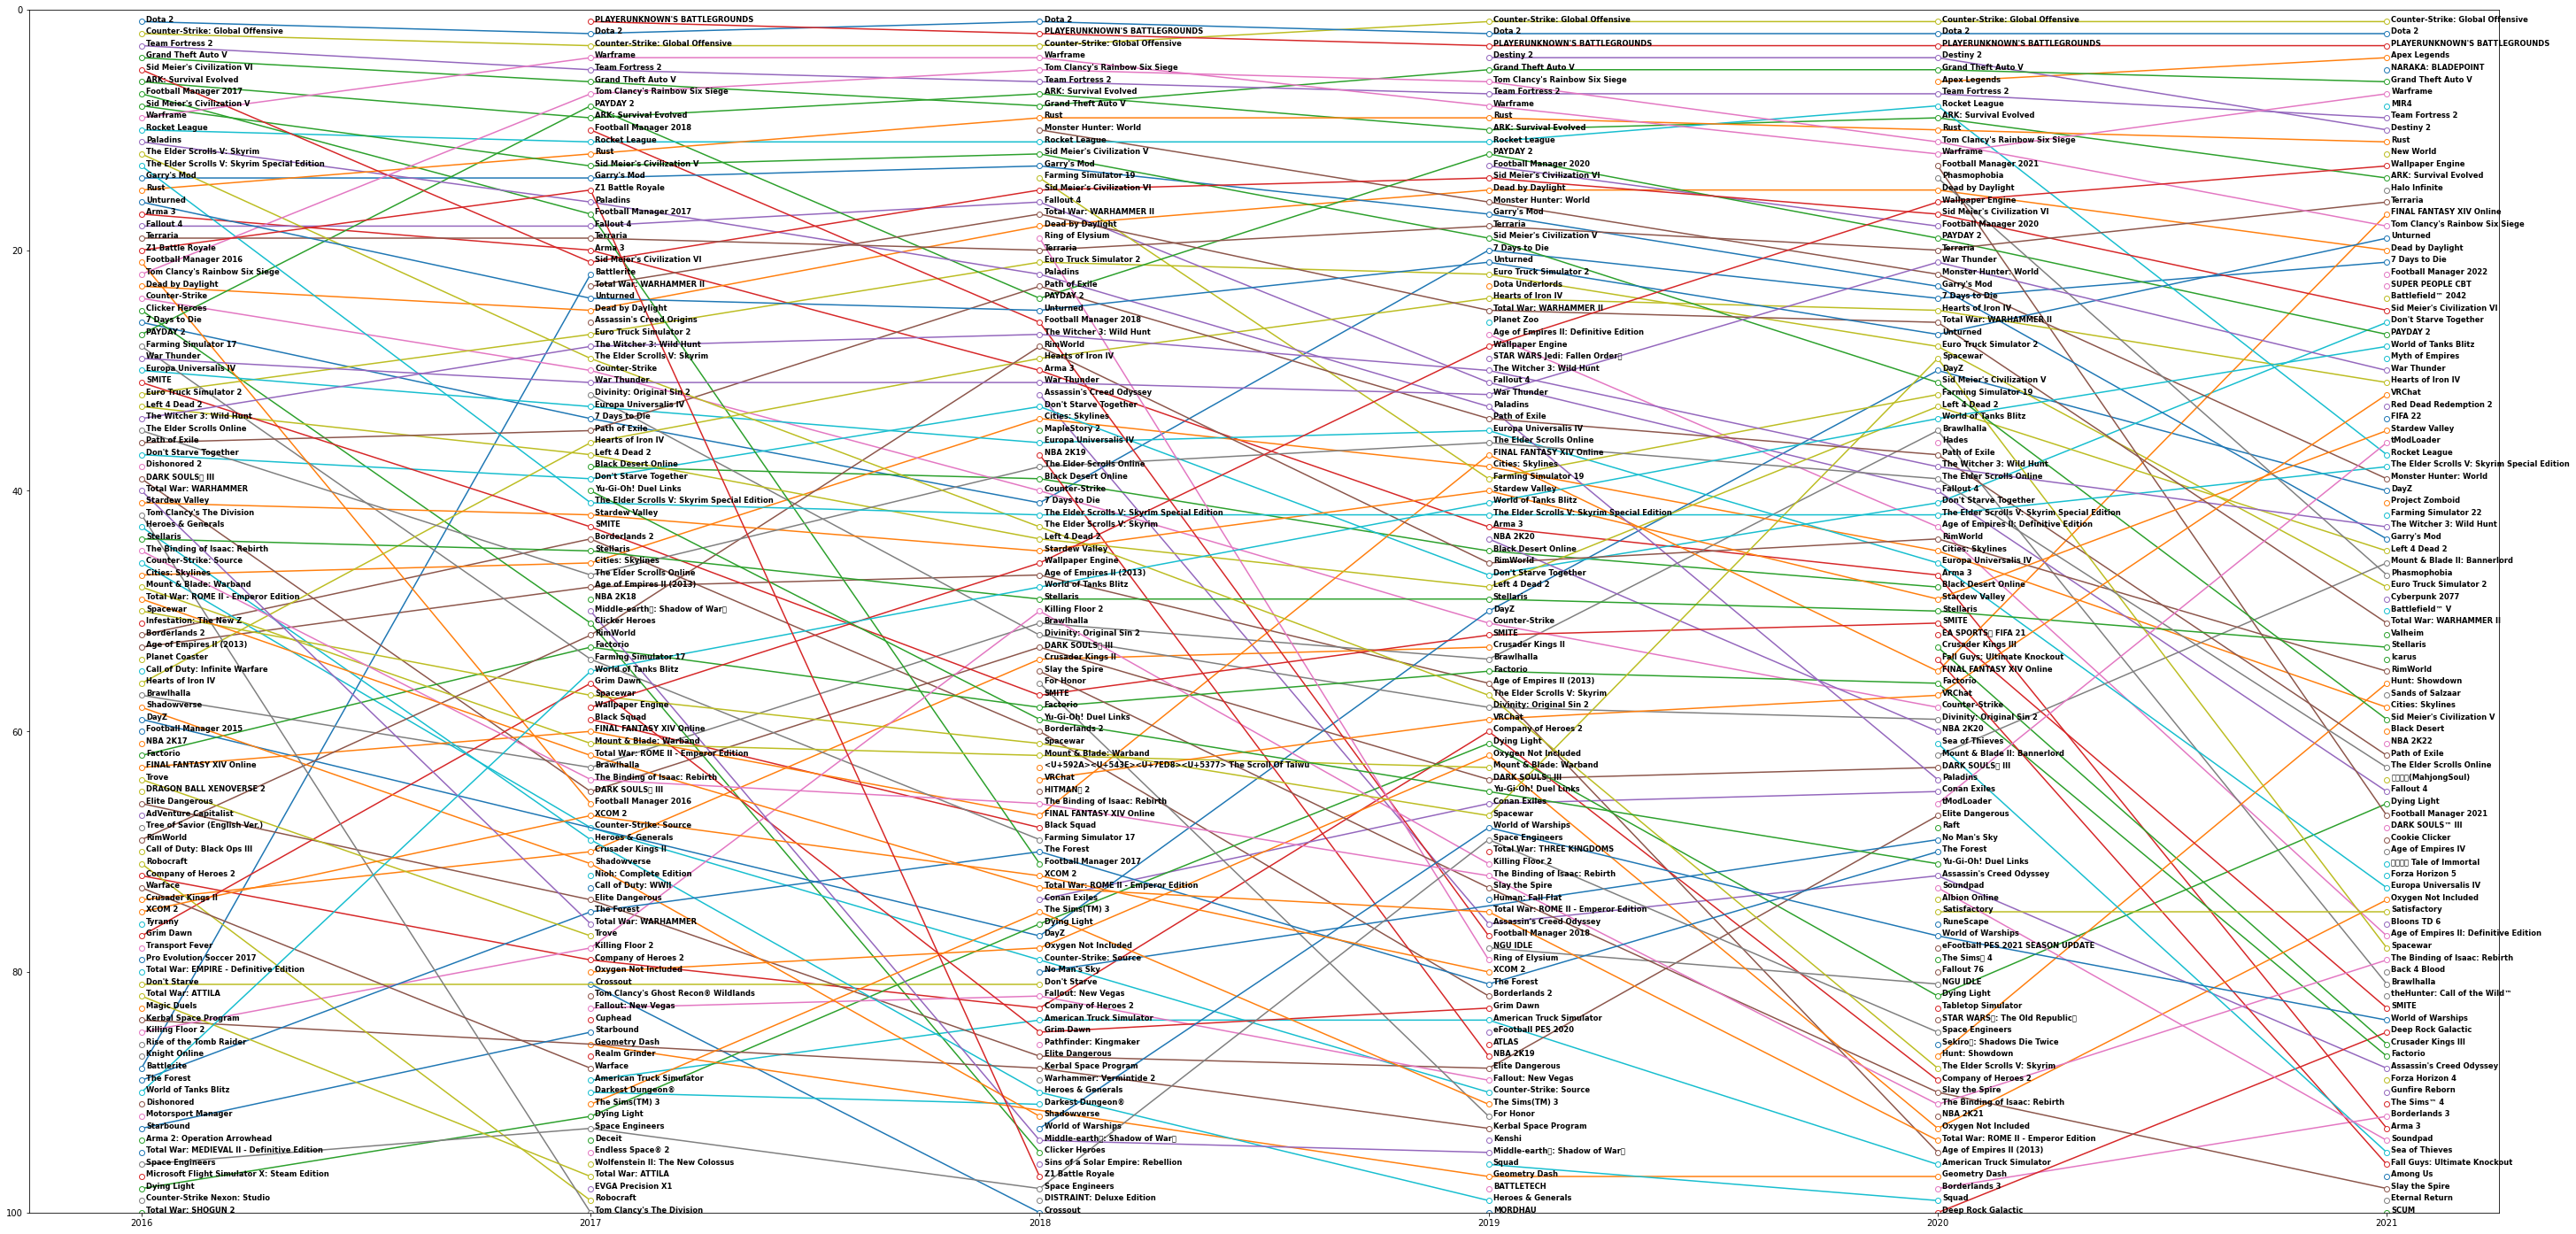

In [60]:
#making a bump chart
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50, 25)
for i, j in top_game.groupby("gamename"):
    plt.plot( "year", "Ranking","o-", data=j, mfc="w")
for count in range(len(top_game)):
    plt.text(top_game['year'][count]+0.01,top_game['Ranking'][count]-0.01,top_game['gamename'][count], horizontalalignment='left', size='small', color='black', weight='semibold')
plt.ylim(0, 100)
plt.gca().invert_yaxis()

Since the graph for top 100 games is too messy, we then focus on top 20 instead  
To have a closer look for the top 20 ranking:

Here, we are only generating the data with top 20 games, so we first need to clean the dataframe, deleting games and rankings after 20.

In [50]:
top_20_game = top_game.loc[top_game['Ranking']<=20]

top_20_game = top_20_game.reset_index(drop = True)

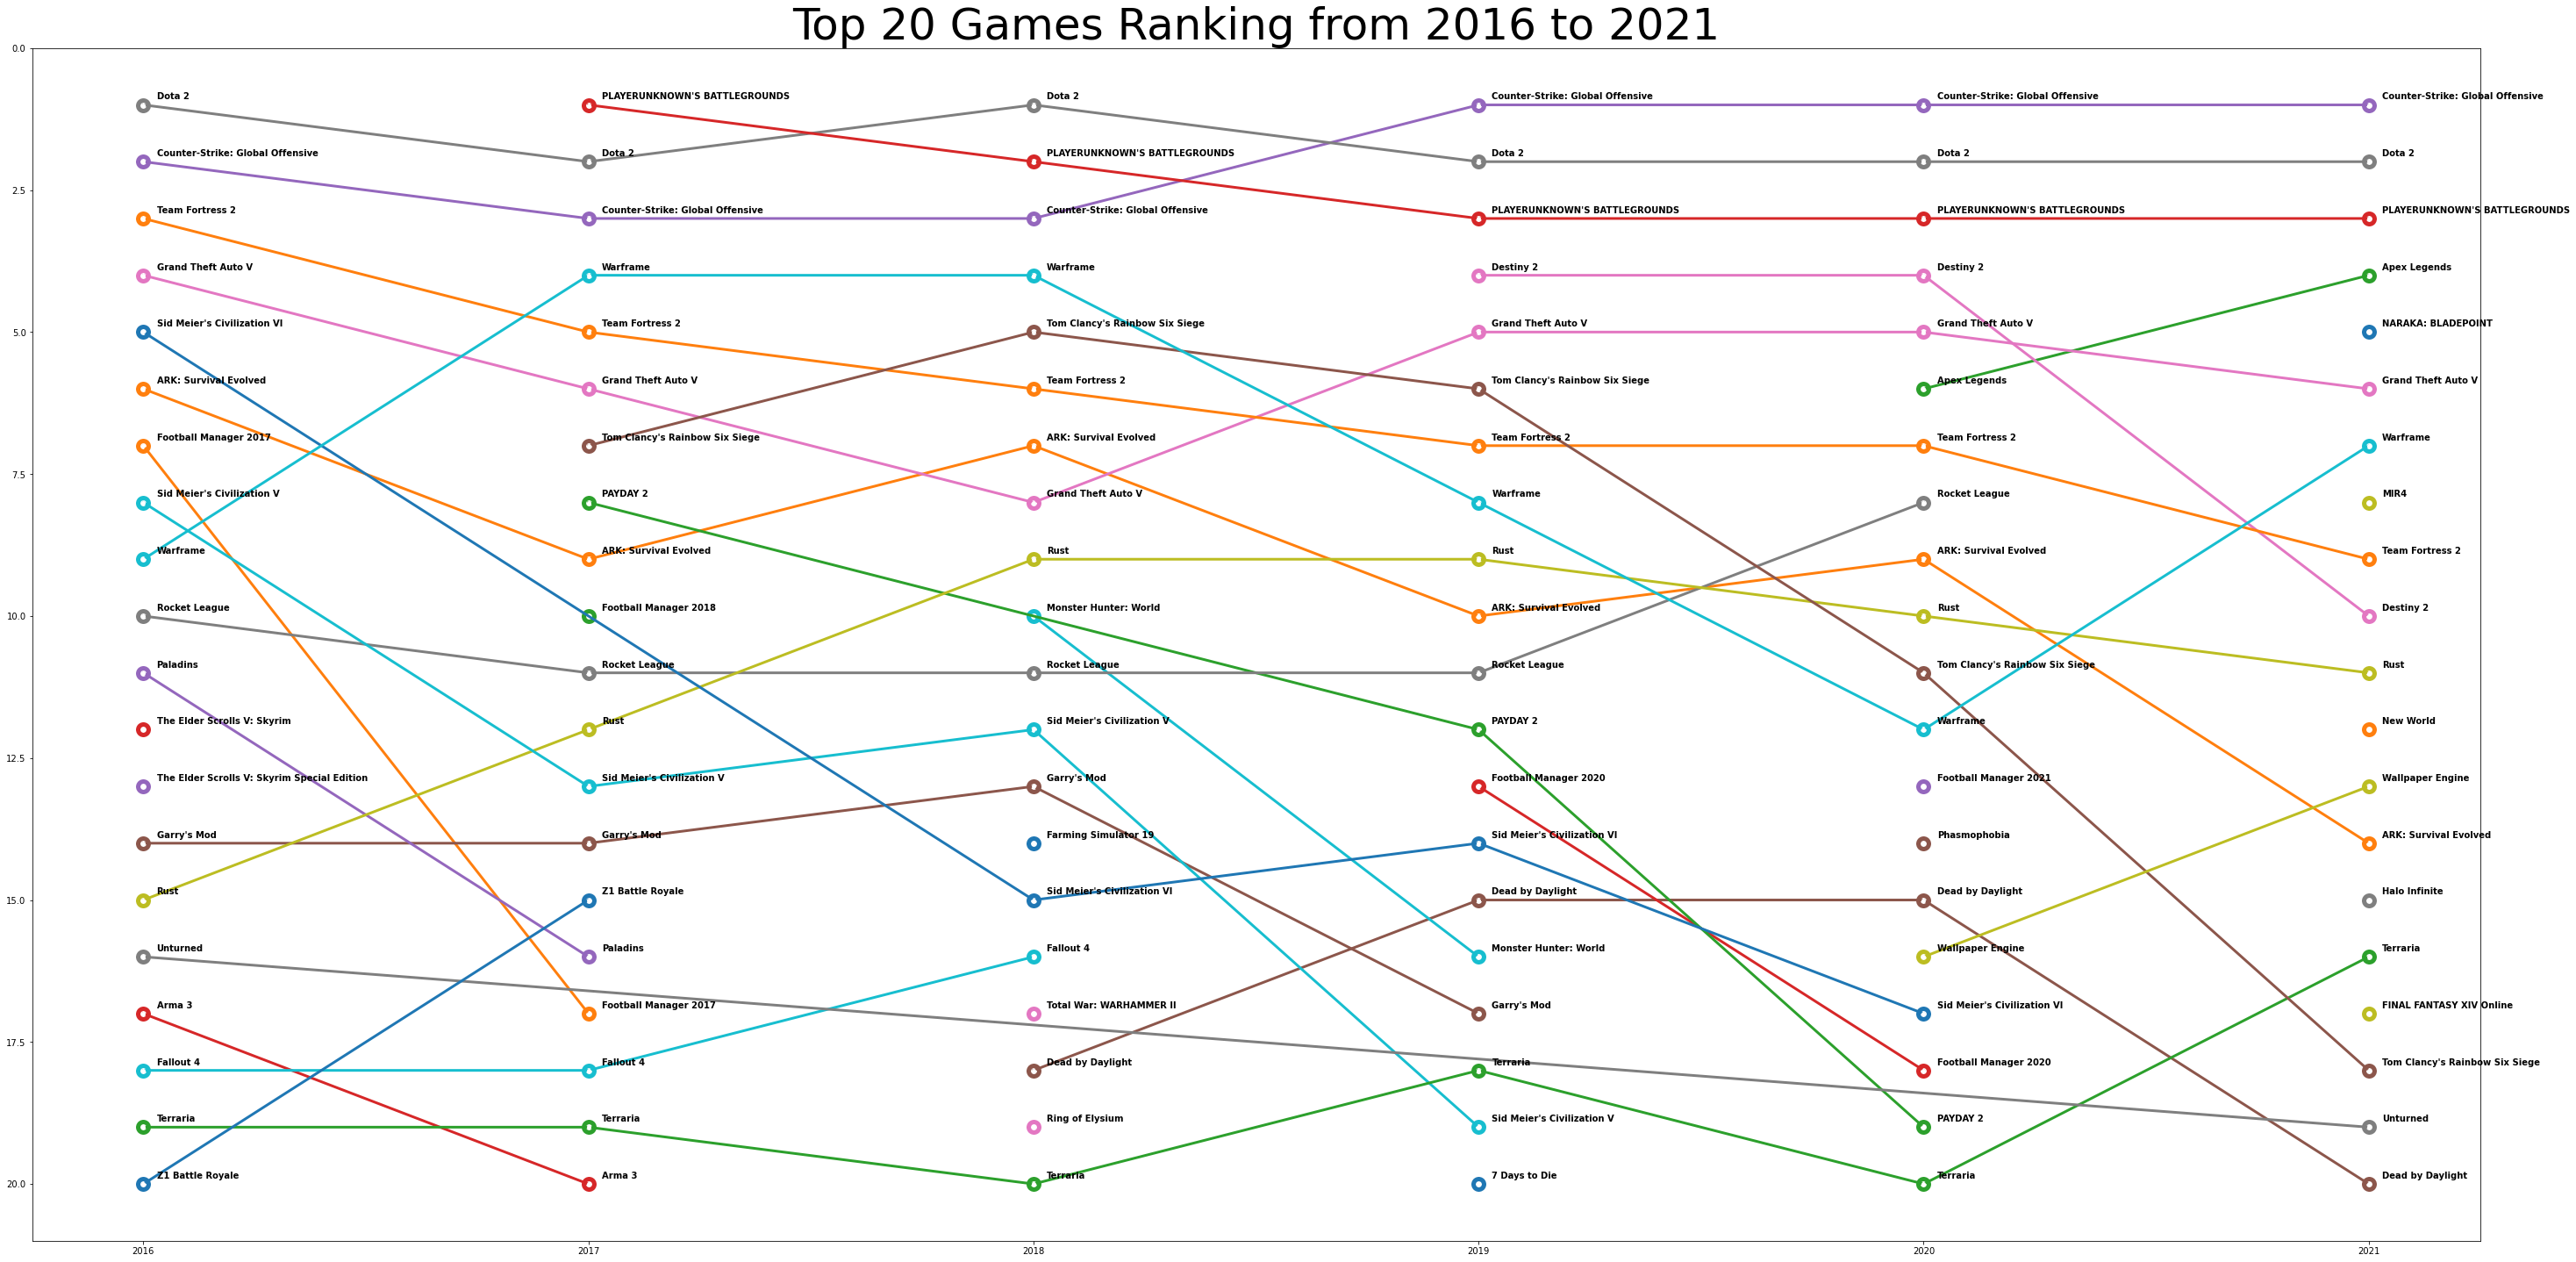

In [51]:
for i, j in top_20_game.groupby("gamename"):
    plt.plot( "year", "Ranking","o-", data=j,lw=3,mfc="w",mew=12,ms=5)
    #for count in j['year']:
        #plt.text(j[count]+0.2, j[count], j[count], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title("Top 20 Games Ranking from 2016 to 2021",size = 50)
for count in range(len(top_20_game)):
    plt.text(top_20_game['year'][count]+0.03,top_20_game['Ranking'][count]-0.1,top_20_game['gamename'][count], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.ylim(0, 21)
plt.gca().invert_yaxis()

From the graph, we can see how the ranking change from 2016 till present.  
We will then utilize the database to calculate the average lifetime of a game.
With the conclusion we get from the project, it would be meaningful for video game companies to set a timeline for the production and announcement of their products

Find the lifetime of a game:   
here, we define the lifetime of a game as the time it stays in the list of top 100 games in the world.



In [52]:
year = 0
count = 0
for a in top_game['gamename']:
    year = year + top_game.loc[top_game['gamename']==a,'year'].count()
    count = count + 1
print(year/count)

4.153333333333333


We can see that the average lifetime of a game is 4.15 years.

### Regression model for lifetime 

In [64]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.6 MB 2.7 MB/s            
     |████████████████████████████████| 233 kB 115.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd
import statsmodels.formula.api as sm

In [168]:
five_year_trend_df = pd.DataFrame()
for a in top_game.groupby('gamename'):
    if len(a[1]) == 6:
        df_new = pd.DataFrame(a[1])
        five_year_trend_df = five_year_trend_df.append(df_new)

In [170]:
five_year_trend_df.head(20)

gamename  year  Ranking
20           7 Days to Die  2021     21.0
123          7 Days to Die  2020     24.0
219          7 Days to Die  2019     20.0
340          7 Days to Die  2018     41.0
433          7 Days to Die  2017     34.0
525          7 Days to Die  2016     26.0
13   ARK: Survival Evolved  2021     14.0
108  ARK: Survival Evolved  2020      9.0
209  ARK: Survival Evolved  2019     10.0
306  ARK: Survival Evolved  2018      7.0
408  ARK: Survival Evolved  2017      9.0
505  ARK: Survival Evolved  2016      6.0
92                  Arma 3  2021     93.0
146                 Arma 3  2020     47.0
242                 Arma 3  2019     43.0
329                 Arma 3  2018     30.0
419                 Arma 3  2017     20.0
516                 Arma 3  2016     17.0
80              Brawlhalla  2021     81.0
134             Brawlhalla  2020     35.0

average ranking of all games that has been on the top ranking since 2016 till present:

In [175]:
print(five_year_trend_df.groupby('year').mean())

        Ranking
year           
2016  31.146341
2017  31.243902
2018  30.048780
2019  30.024390
2020  31.682927
2021  40.804878


So, it seems like there doesn't exist a relationship between the game ranking and its year since publish. Thus we failed to build a regression line between the relation of ranking and year. If we didn't consider the data of 2021(since there are many unpredictable side effect to the game production industry brought by the outbreak of Covid-19). It shows that the ranking of the game are roughtly the same. This implies that the if a game is popular at first, it is really likely to stay popular within 5 years. This is a good signal since the average year of a game on the top ranking is only 4 years. 